# PRODAJA STANOVANJ

# 1. Naložimo podatke

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (15, 5)
pd.options.display.max_rows = 20

stanovanja = pd.read_csv('urejeni_oglasi1.csv', encoding = 'cp1250')
stanovanja


,id,naslov,cena,velikost,prodajalec,leto,nadstropje
0,5952316,LJ. MOSTE,200000.00,118.60,Kristal nepremičnine d.o.o.,1900,P
1,5797965,TACEN,200000.00,122.28,"REMAX Vogal, Nepremičninska družba, d.o.o.",2009,2
2,5929181,"LJ. BEŽIGRAD, ZUPANČIČEVA JAMA - VELIKA TERASA",200000.00,58.60,Eventum d.o.o.,2005,VP
3,6054338,"LJ. MOSTE, ZALOG",200000.00,108.30,Rocco nepremičnine d.o.o.,1960,1
4,6060505,"VIŽMARJE, GUNCLJE",200000.00,164.00,Mreža nepremičnin d.o.o.,2000,P+1
5,5938232,"LJ. ŠIŠKA, MALGAJEVA 2",200000.00,110.00,Zasebna ponudba,1986,4
6,5966303,"ČRNUČE, SPODNJE OKROGARJEVA 2",199365.19,99.06,LIN nepremičnine d.o.o.,2017,2
7,6034990,"TRNOVO, TRNOVSKA VRATA",199000.00,50.90,"Nepremičnine M8, Lea Kavalič s.p.",2005,1
8,6047368,"LJ. VIČ, VELIK ATRIJ",199000.00,89.00,Euromark-a d.o.o.,2008,ni podatka
9,6061555,LJ. BEŽIGRAD,199000.00,90.00,"MA - nepremičninska družba, Marko Alič s.p.",1957,2


# 2. Osnovna obdelava podatkov

In [41]:
st_oglasov = len(stanovanja)
st_oglasov

616

Izračunajmo povprečno ceno vseh oglasov, povprečno kvadraturo in povprečno ceno na kvadratni meter.

In [42]:
povprecna_cena = sum(stanovanja['cena']) / st_oglasov
print ("%.2f" % povprecna_cena)

132195.40


In [43]:
povprecni_m2 = sum(stanovanja['velikost']) / st_oglasov
print("%.2f" % povprecni_m2)

62.40


In [44]:
povprecna_cena_m2 = povprecna_cena / povprecni_m2
print ("%.2f" % povprecna_cena_m2)

2118.46


V tabelo stanovanja dodajmo stolpec cena na kvadratni meter.

In [45]:
stanovanja['cena na m2'] =  stanovanja['cena'] / stanovanja['velikost']
stanovanja['cena na m2'] = stanovanja['cena na m2'].round(2)

Poglejmo v katerem nadstropju se prodaja največ stanovanj.

In [46]:
nadstropje = stanovanja['nadstropje'].value_counts()
nadstropje[:1]

1    126
Name: nadstropje, dtype: int64

Poglejmo katerega leta so bila zgrajena stanovanja, ki se prodajajo. Analizirajmo, koliko je stanovanj iz prejšnjega stoletja in koliko iz tekočega. Kakšna je razlika v ceni? Analiziramo le tista stanovanja, za katera je podano leto izgradnje.

In [47]:
leto = stanovanja['leto'].value_counts()
leto [:10]

2009    57
1978    21
2008    18
1972    18
1960    18
1964    18
2016    17
2017    17
1976    17
1974    14
Name: leto, dtype: int64

In [48]:
#koliko je stanovanj zgrajenih pred letom 2000
stara_stanovanja = stanovanja[stanovanja.leto <= '2000']
len(stara_stanovanja)

449

In [113]:
# povprečna cena na m2 stanovanj leto < 2000
povprecna_cena_stara_stanovanja = sum(stara_stanovanja['cena']) / sum(stara_stanovanja['velikost'])
povprecna_cena_stara_stanovanja.round(2)

2066.23

In [114]:
#koliko je stanovanj zgrajenih po letu 2000
novejsa_stanovanja = stanovanja[stanovanja.leto > '2000']
novejsa_stanovanja = novejsa_stanovanja[novejsa_stanovanja.leto != 'ni podatka']
len(novejsa_stanovanja)

165

In [115]:
#povprečna cena na m2 stanovanj leto > 2000
povprecna_cena_novejsa_stanovanja = sum(novejsa_stanovanja['cena']) / sum(novejsa_stanovanja['velikost'])
print ("%.2f" % (povprecna_cena_novejsa_stanovanja))

2263.16


In [116]:
#stara stanovanja so v povprečju za 8.7% cenejša od novejših (gledano na m2)
print ("%.2f" % (100 - (povprecna_cena_stara_stanovanja / povprecna_cena_novejsa_stanovanja) * 100))

8.70


# 3. Nepremičninske agencije

Zdaj se osredotočimo na prodajalce stanovanj oz nepremičninske agencije. Poglejmo, katere agencije prodajajo največ stanovanj, nato pa analizirajmo, kakšna so stanovanja, prodajana v zasebni ponudbi.

In [53]:
ponudniki = stanovanja['prodajalec'].value_counts()
ponudniki[:10]

Zasebna ponudba                               101
MESTO NEPREMIČNIN d.o.o.                       46
Stoja trade, d.o.o., Ljubljana                 33
LJUBLJANA NEPREMIČNINE d.o.o.                  30
Mreža nepremičnin d.o.o.                       22
REMAX Vogal, Nepremičninska družba, d.o.o.     19
LIN nepremičnine d.o.o.                        17
STAN nepremičnine d.o.o., Ljubljana            17
ABC nepremičnine d.o.o.                        15
Rojal invest d.o.o.                            14
Name: prodajalec, dtype: int64

In [54]:
zasebna_ponudba = stanovanja[stanovanja['prodajalec'].str.contains('Zasebna ponudba')]

povprecna_cena_m2_zasebna_ponudba = sum(zasebna_ponudba['cena']) / sum(zasebna_ponudba['velikost'])
print ("%.2f" % povprecna_cena_m2_zasebna_ponudba)
procent = ("%.2f" % ((povprecna_cena_m2_zasebna_ponudba / povprecna_cena_m2) * 100))
print (procent)
#povprečna cena na m2 zasebnih ponudb je za manj kot 0,1% večja od povprečne cene na kvadratni meter, torej je skoraj enaka

st_zasebih_ponudb_pred_2000 = len(zasebna_ponudba[zasebna_ponudba.leto <= '2000'])
procent_zasebnih_ponudb_zgrajenih_pred_2000 = (len(zasebna_ponudba[zasebna_ponudba.leto < '2000']) / len(zasebna_ponudba)) * 100
procent_zasebnih_ponudb_zgrajenih_pred_2000
#74.26% zasebnih ponudb je bilo zgrajenih pred letom 2000

2119.72
100.06


74.25742574257426

Poglejmo katera agencija prodaja najdražja stanovanja. Osredotočimo se le na agencije, ki prodajajo vsaj 10 stanovanj in niso zasebna ponudba.

In [55]:
agencije = stanovanja.groupby('prodajalec')
agencije1 = agencije.count()

agencije2 = agencije1[agencije1.id >= 10]

In [98]:
agencije3 = list(agencije2.index.values)

povprecna_cena_agencije = []
for i in agencije3:
    if i != 'Zasebna ponudba': 
        tabelca = pd.DataFrame(index=[str(i)],columns=['povprečna cena na m2'])
        agencija = stanovanja[stanovanja['prodajalec'].str.contains(i)]
        tabelca['povprečna cena na m2'] = sum(agencija['cena'] / sum(agencija['velikost']))
        povprecna_cena_agencije.append(tabelca)
    
povprecna_cena_agencije1 = pd.concat(povprecna_cena_agencije)
povprecna_cena_agencije1['povprečna cena na m2'] = povprecna_cena_agencije1['povprečna cena na m2'].round(2)
povprecna_cena_agencije1.sort_values('povprečna cena na m2', ascending = False)

,povprečna cena na m2
Rocco nepremičnine d.o.o.,2481.87
MESTO NEPREMIČNIN d.o.o.,2296.46
Rojal invest d.o.o.,2260.58
Mreža nepremičnin d.o.o.,2226.29
ABC nepremičnine d.o.o.,2193.78
LJUBLJANA NEPREMIČNINE d.o.o.,2137.77
"STAN nepremičnine d.o.o., Ljubljana",2104.38
LIN nepremičnine d.o.o.,2059.10
"Stoja trade, d.o.o., Ljubljana",2043.92
"REMAX Vogal, Nepremičninska družba, d.o.o.",1714.65


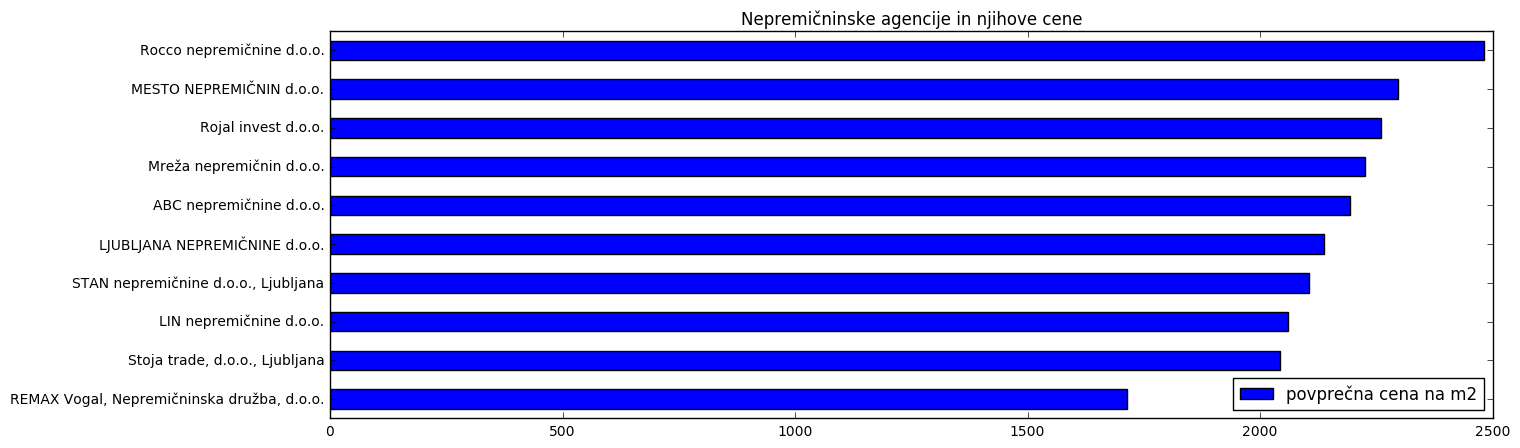

In [108]:
povprecna_cena_agencije1.sort_values('povprečna cena na m2', ascending = True).plot(kind = 'barh', title = 'Nepremičninske agencije in njihove cene')

Rocco nepremičnine d.o.o prodaja najdražja stanovanja. Pri tej agenciji za en kvadratni meter v povprečju odštejemo kar 2481.87€

# 4. Primerjava stanovanj po upravnih enotah Ljubljane

In [64]:
predeli = [{'enota': 'BEŽIGRAD' , 'obmocja' : ['BEŽIGRAD', 'ČRNUČE', 'SAVSKO NASELJE', 'SAVLJE', 'BS 3', 'BEŽIGRAJSKI DVOR','ČRNUŠKA GMAJNA', 'ŽUPANČIČEVA JAMA', 'ZUPANČIČEVA JAMA', 'BRINJE', 'STOŽICE', 'TOMAČEVO']},
           {'enota': 'ŠIŠKA', 'obmocja' : ['TACEN', 'ŠIŠKA', 'DRAVLJE', 'ŠENTVID', 'KOSEZE', 'PODUTIK', 'ŠMARTNO', 'PRŽAN']},
           {'enota' : 'CENTER' , 'obmocja' : ['CENTER', 'VODMAT', 'STARA LJ', 'TABOR', 'POLJANE']},
           {'enota' : 'VIČ-RUDNIK', 'obmocja' : ['VIČ', 'DOLGI MOST', 'RUDNIK', 'VIŽMARJE', 'RAKOVNIK', 'BROD', 'ROŽNA DOLINA', 'GALJEVICA', 'TRNOVO', 'VRHOVCI']},
           {'enota' : 'MOSTE', 'obmocja': ['MOSTE', 'POLJE', 'ZALOG', 'VEVČE', 'JARŠE', 'BTC', 'ŠTEPANJSKO NASELJE', 'FUŽINE', 'ŠTEPANJA VAS', 'KODELJEVO', 'KAŠELJ', 'DOBRUNJE', 'SOSTRO']}
            ]
lala = []
stanovanja1 = stanovanja
for x in predeli:
    slovar = {}
    frames = []
    
    for i in x['obmocja']:
        
        enota = stanovanja1[stanovanja1['naslov'].str.contains(i)]
        frames.append(enota)
        
    result = pd.concat(frames)
    result1 = result.drop_duplicates(subset = 'id')
    slovar['ue'] = x['enota']
    slovar['tabela'] = result1
    lala.append(slovar)
    stanovanja1 = stanovanja1.append(result1).drop_duplicates(keep = False)
#V seznamu lala je vsaki upravni enoti prirejena tabela, ki vsebuje vsa stanovanja, prodajana v tej upravni enoti.

In [95]:
#preverimo, da so se vsa stanovanja razporedila
frames = []
for i in lala:
    frames.append(i['tabela'])
    
result = pd.concat(frames)
result1 = result.drop_duplicates()
result1.sort_index()

,id,naslov,cena,velikost,prodajalec,leto,nadstropje,cena na m2,upravna enota
0,5952316,LJ. MOSTE,200000.00,118.60,Kristal nepremičnine d.o.o.,1900,P,1686.34,MOSTE
1,5797965,TACEN,200000.00,122.28,"REMAX Vogal, Nepremičninska družba, d.o.o.",2009,2,1635.59,ŠIŠKA
2,5929181,"LJ. BEŽIGRAD, ZUPANČIČEVA JAMA - VELIKA TERASA",200000.00,58.60,Eventum d.o.o.,2005,VP,3412.97,BEŽIGRAD
3,6054338,"LJ. MOSTE, ZALOG",200000.00,108.30,Rocco nepremičnine d.o.o.,1960,1,1846.72,MOSTE
4,6060505,"VIŽMARJE, GUNCLJE",200000.00,164.00,Mreža nepremičnin d.o.o.,2000,P+1,1219.51,VIČ-RUDNIK
5,5938232,"LJ. ŠIŠKA, MALGAJEVA 2",200000.00,110.00,Zasebna ponudba,1986,4,1818.18,ŠIŠKA
6,5966303,"ČRNUČE, SPODNJE OKROGARJEVA 2",199365.19,99.06,LIN nepremičnine d.o.o.,2017,2,2012.57,BEŽIGRAD
7,6034990,"TRNOVO, TRNOVSKA VRATA",199000.00,50.90,"Nepremičnine M8, Lea Kavalič s.p.",2005,1,3909.63,VIČ-RUDNIK
8,6047368,"LJ. VIČ, VELIK ATRIJ",199000.00,89.00,Euromark-a d.o.o.,2008,ni podatka,2235.96,VIČ-RUDNIK
9,6061555,LJ. BEŽIGRAD,199000.00,90.00,"MA - nepremičninska družba, Marko Alič s.p.",1957,2,2211.11,BEŽIGRAD


Za vsako upravno enoto nas zanima koliko je tam prodajanih stanovanj, kakšna je povprečna cena posamezne enote (in v primerjavi s povprečno ceno vseh prodajanih stanovanj), kakšna je povprečna cena na kvadratni meter in kakšna je povprečna velikost.

In [101]:
povprecne = []
for i in lala:
    povprecna = pd.DataFrame(index=[str(i['ue'])],columns=['št stanovanj', 'povprečna cena', '% od povprečne cene', 'povprečna cena na m2', 'povprečna velikost'])
    povprecna['št stanovanj'] = int(len(i['tabela']))
    povprecna['povprečna cena'] = ("%.2f" % (sum(i['tabela']['cena']) / len(i['tabela'])))
    povprecna['% od povprečne cene'] = ("%.2f" %  (((sum(i['tabela']['cena']) / len(i['tabela'])) / povprecna_cena) * 100))
    povprecna['povprečna cena na m2'] = ("%.2f" %  (sum(i['tabela']['cena']) / sum(i['tabela']['velikost'])))
    povprecna['povprečna velikost'] = ("%.2f" %  (sum(i['tabela']['velikost']) / len(i['tabela'])))
    povprecne.append(povprecna)
povprecne1 = pd.concat(povprecne)
povprecne1.sort_values('št stanovanj', ascending = False)

,št stanovanj,povprečna cena,% od povprečne cene,povprečna cena na m2,povprečna velikost
ŠIŠKA,191,124695.07,94.33,2032.80,61.34
BEŽIGRAD,166,141271.53,106.87,2217.56,63.71
MOSTE,112,124943.75,94.51,2040.44,61.23
VIČ-RUDNIK,85,139867.42,105.80,1996.23,70.07
CENTER,62,133582.26,101.05,2483.92,53.78


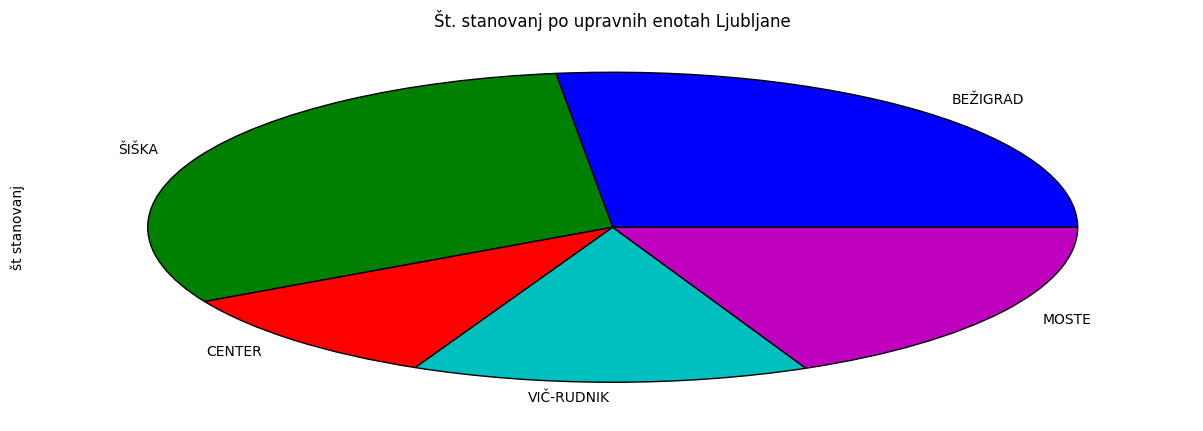

In [109]:
povprecne1['št stanovanj'].astype(float).plot(kind='pie', title='Št. stanovanj po upravnih enotah Ljubljane')

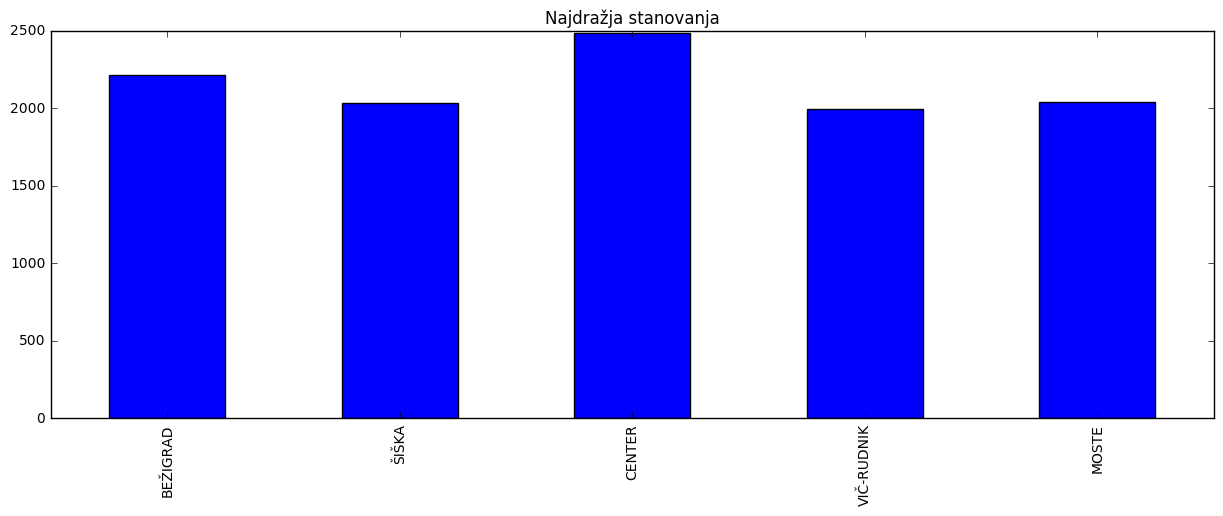

In [110]:
povprecne1['povprečna cena na m2'].astype(float).plot(kind = 'bar', title = 'Najdražja stanovanja')

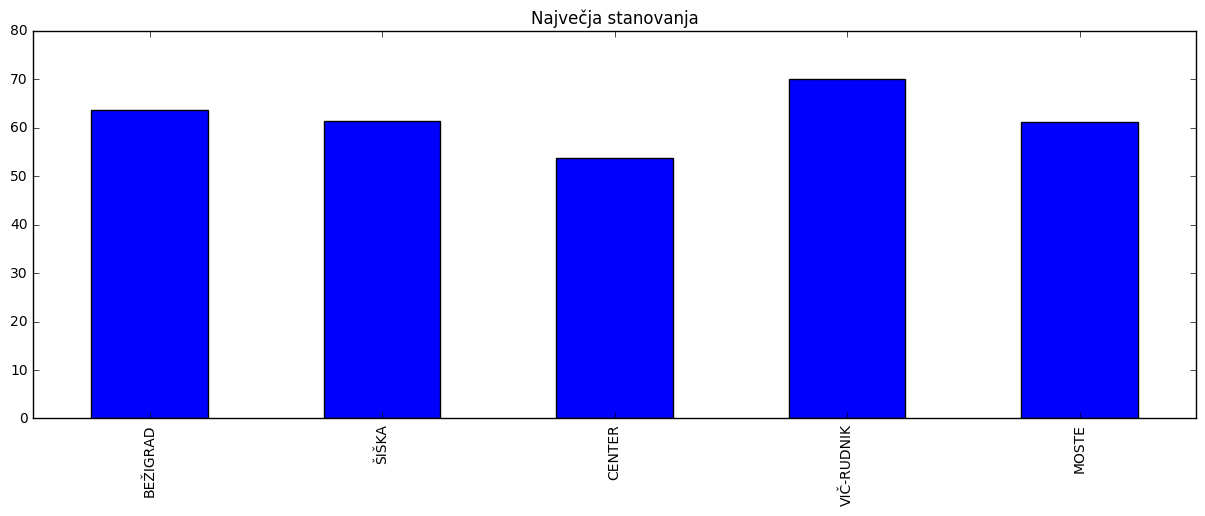

In [111]:
povprecne1['povprečna velikost'].astype(float).plot(kind = 'bar', title = 'Največja stanovanja')

Ugotovitve:
1. V Šiški se prodaja največ stanovanj
2. V centru so stanovanja najdražja in najmanjša
3. Vič-Rudnik ima najcenejša in največja stanovanja

Dodajmo zdaj v tabelo stanovanja še stolpec upravna enota.

In [97]:
stanovanja0 = []
for i in lala:
    i['tabela']['upravna enota'] = str(i['ue'])
    stanovanja0.append(i['tabela'])
stanovanja = pd.concat(stanovanja0)
stanovanja.sort_index()    

,id,naslov,cena,velikost,prodajalec,leto,nadstropje,cena na m2,upravna enota
0,5952316,LJ. MOSTE,200000.00,118.60,Kristal nepremičnine d.o.o.,1900,P,1686.34,MOSTE
1,5797965,TACEN,200000.00,122.28,"REMAX Vogal, Nepremičninska družba, d.o.o.",2009,2,1635.59,ŠIŠKA
2,5929181,"LJ. BEŽIGRAD, ZUPANČIČEVA JAMA - VELIKA TERASA",200000.00,58.60,Eventum d.o.o.,2005,VP,3412.97,BEŽIGRAD
3,6054338,"LJ. MOSTE, ZALOG",200000.00,108.30,Rocco nepremičnine d.o.o.,1960,1,1846.72,MOSTE
4,6060505,"VIŽMARJE, GUNCLJE",200000.00,164.00,Mreža nepremičnin d.o.o.,2000,P+1,1219.51,VIČ-RUDNIK
5,5938232,"LJ. ŠIŠKA, MALGAJEVA 2",200000.00,110.00,Zasebna ponudba,1986,4,1818.18,ŠIŠKA
6,5966303,"ČRNUČE, SPODNJE OKROGARJEVA 2",199365.19,99.06,LIN nepremičnine d.o.o.,2017,2,2012.57,BEŽIGRAD
7,6034990,"TRNOVO, TRNOVSKA VRATA",199000.00,50.90,"Nepremičnine M8, Lea Kavalič s.p.",2005,1,3909.63,VIČ-RUDNIK
8,6047368,"LJ. VIČ, VELIK ATRIJ",199000.00,89.00,Euromark-a d.o.o.,2008,ni podatka,2235.96,VIČ-RUDNIK
9,6061555,LJ. BEŽIGRAD,199000.00,90.00,"MA - nepremičninska družba, Marko Alič s.p.",1957,2,2211.11,BEŽIGRAD


Ada Šadl Praprotnik